In [2]:
import pandas as pd 
import numpy as np

In [13]:
weather_df = pd.read_csv("../Resources/weather_classified_df.csv")
collision_df = pd.read_csv("../Resources/collision_2022_classified.csv")


/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_31108/2605401734.py:2: DtypeWarning: Columns (12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df = pd.read_csv("../Resources/collision_2022_classified.csv")


In [21]:
collision_df['zip_code'] = collision_df['zip_code'].astype('str')
collision_df[collision_df['zip_code'].str.len() != 5]['zip_code']

32614          7514
40803          7307
42237          7006
43318          7047
70171     113541906
93920          8721
99571          7305
100483         8721
Name: zip_code, dtype: object

In [ ]:
collision_df.loc[collision_df['zip_code'] == '113541906','zip_code'] = "11354"

In [34]:
## drop the rows that have four-digit zip code
collision_df.drop(collision_df[collision_df['zip_code'].str.len() != 5].index, inplace = True)
collision_df

,crash_datetime,crash_day_of_week,crash_hour_category,street_address,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor,number_of_deaths,number_of_injuries,death_rate,injuries_rate,severity_of_accident,month,year,day_of_week,hour
0,2022-03-26 11:45:00,5,Other Hours,Queensboro Bridge Upper,1,0,0,0,0,0,...,Pavement Slippery,0,2,0.0,0.000165,Serious,3,2022,Saturday,11
1,2022-06-29 06:55:00,2,Early Morning,Throgs Neck Bridge,0,0,0,0,0,0,...,Following Too Closely,0,0,0.0,0.000000,Light,6,2022,Wednesday,6
2,2022-06-29 16:00:00,2,Rush Hours,Williamsburg Bridge Outer Roadwa,1,0,0,0,0,0,...,Driver Inattention/Distraction,0,2,0.0,0.000030,Serious,6,2022,Wednesday,16
3,2022-07-12 17:50:00,1,Rush Hours,44 Empire Boulevard,0,0,0,0,0,0,...,Oversized Vehicle,0,0,0.0,0.000000,Light,7,2022,Tuesday,17
4,2022-03-23 10:00:00,2,Other Hours,71 East Drive,0,0,0,0,0,0,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,0.0,0.000000,Light,3,2022,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103784,2022-09-15 19:49:00,3,Rush Hours,East New York Avenue & Rockaway Parkway,0,0,0,0,0,0,...,Driver Inattention/Distraction,0,0,0.0,0.000000,Light,9,2022,Thursday,19
103785,2022-07-21 22:05:00,3,Late Night,Cross Island Parkway,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,22
103786,2022-12-31 02:00:00,5,Late Night,Tilden Avenue,1,0,0,0,0,0,...,Traffic Control Disregarded,0,2,0.0,0.000025,Serious,12,2022,Saturday,2
103787,2022-07-14 05:00:00,3,Early Morning,2501 Cortelyou Road,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,5


In [35]:
weather_df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip',
       'preciptype', 'snow', 'windspeed', 'visibility', 'severerisk',
       'sunrise', 'sunset', 'icon', 'temperature_category', 'precip_category',
       'humid_category', 'wind_level'],
      dtype='object')

In [36]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
collision_df['crash_datetime'] = pd.to_datetime(collision_df['crash_datetime'])

In [37]:
collision_df['date'] = collision_df['crash_datetime'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [38]:
collision_df['date'] = pd.to_datetime(collision_df['date'])

In [39]:
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103782 entries, 0 to 103788
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_datetime                 103782 non-null  datetime64[ns]
 1   crash_day_of_week              103782 non-null  int64         
 2   crash_hour_category            103782 non-null  object        
 3   street_address                 103780 non-null  object        
 4   number_of_persons_injured      103782 non-null  int64         
 5   number_of_persons_killed       103782 non-null  int64         
 6   number_of_pedestrians_injured  103782 non-null  int64         
 7   number_of_pedestrians_killed   103782 non-null  int64         
 8   number_of_cyclist_injured      103782 non-null  int64         
 9   number_of_cyclist_killed       103782 non-null  int64         
 10  number_of_motorist_injured     103782 non-null  int64         
 11  numbe

In [41]:
## create a collision_count_df that counts the total number of accidents by date
columns_to_drop = ["latitude", "longitude","Population Density","death_rate","injuries_rate","month","year","hour","Population","crash_day_of_week"]
collision_count_df = collision_df.groupby('date').sum(numeric_only=True).drop(columns_to_drop, axis = 1)
collision_count_df["count"] = collision_df.groupby('date').size()

collision_count_df

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_deaths,number_of_injuries,count
date,,,,,,,,,,,
2022-01-01,140,0,24,0,10,0,104,0,0,278,283
2022-01-02,77,2,12,1,8,0,53,1,4,150,181
2022-01-03,80,0,15,0,5,0,59,0,0,159,208
2022-01-04,113,2,27,1,2,0,83,1,4,225,255
2022-01-05,152,0,25,0,6,0,118,0,0,301,306
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,89,0,22,0,3,0,61,0,0,175,213
2022-12-28,118,4,16,1,10,1,88,2,8,232,221
2022-12-29,129,3,24,1,7,0,92,2,6,252,203


In [42]:
## merge the weather info to the collision_count_df
columns_to_add = ['datetime','icon', 'temperature_category', 'precip_category','humid_category', 'wind_level','snow', 'visibility']
weather_cat_df = weather_df[columns_to_add].set_index('datetime')
merged_df = pd.merge(collision_count_df, weather_cat_df, left_index = True,right_index=True)

In [43]:
## create a new index so that we can include the everyday weather info for each zip code 
collision_df['zip_code'] = collision_df['zip_code'].astype(str)
collision_df["row_id"] = collision_df['zip_code'] + '_'+ collision_df["date"].astype(str)
collision_df1 = collision_df.set_index('row_id')

In [44]:
weather_cat_df.reset_index(inplace = True) 
weather_cat_df = weather_cat_df.rename(columns={'datetime': 'date'})
weather_cat_df.set_index("date",inplace = True)
weather_cat_df

,icon,temperature_category,precip_category,humid_category,wind_level,snow,visibility
date,,,,,,,
2022-01-01,rain,Moderate,Heavy,Very High,Flags wave,0,5.4
2022-01-02,rain,Moderate,Light,Very High,Leaves scatter,0,7.3
2022-01-03,cloudy,Cold,Dry,Low,Leaves scatter,0,9.9
2022-01-04,clear-day,Cold,Dry,Low,Leaves scatter,0,9.9
2022-01-05,rain,Cold,Moderate,High,Leaves scatter,0,8.4
...,...,...,...,...,...,...,...
2022-12-27,cloudy,Cold,Dry,Low,Flags wave,0,9.9
2022-12-28,cloudy,Moderate,Dry,Low,Flags wave,0,9.9
2022-12-29,clear-day,Moderate,Dry,Low,Flags wave,0,9.9


In [45]:
zipcode_weather_df = pd.merge(collision_df1, weather_cat_df, on='date', how='left').set_index(collision_df1.index)

In [46]:
zipcode_weather_df.columns

Index(['crash_datetime', 'crash_day_of_week', 'crash_hour_category',
       'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Population Density',
       'Population', 'contributing_factor', 'number_of_deaths',
       'number_of_injuries', 'death_rate', 'injuries_rate',
       'severity_of_accident', 'month', 'year', 'day_of_week', 'hour', 'date',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level', 'snow', 'visibility'],
      dtype='object')

In [47]:
## only keep the weather info for each zip code
columns_to_keep = ["zip_code",'date','icon', 'temperature_category', 'precip_category', 'humid_category','wind_level', 'snow', 'visibility']
zipcode_weather_df = zipcode_weather_df[columns_to_keep]


In [48]:
## count the number of accidents that have happened for each zip code
zipcode_weather_df.groupby(zipcode_weather_df['zip_code']).size()


zip_code
10000     30
10001    590
10002    880
10003    415
10004     89
        ... 
11798      2
13367      1
13625      1
14092      1
14487      1
Length: 238, dtype: int64

In [62]:
zipcode_weather_df['wind_level']

# there are a total of 245 zipcodes and a total of 1M row entries (because there are multiple accidents for each zip code) in my dataset. My goal is to create the weather info boxplot for each zipcode 

row_id
10044_2022-03-26      Leaves scatter
10465_2022-06-29      Leaves scatter
11211_2022-06-29      Leaves scatter
11225_2022-07-12      Leaves scatter
11225_2022-03-23      Leaves scatter
                          ...       
11213_2022-09-15    Small trees sway
11411_2022-07-21      Leaves scatter
11203_2022-12-31        Flags ripple
11226_2022-07-14          Flags wave
10033_2022-11-15      Leaves scatter
Name: wind_level, Length: 103782, dtype: object

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

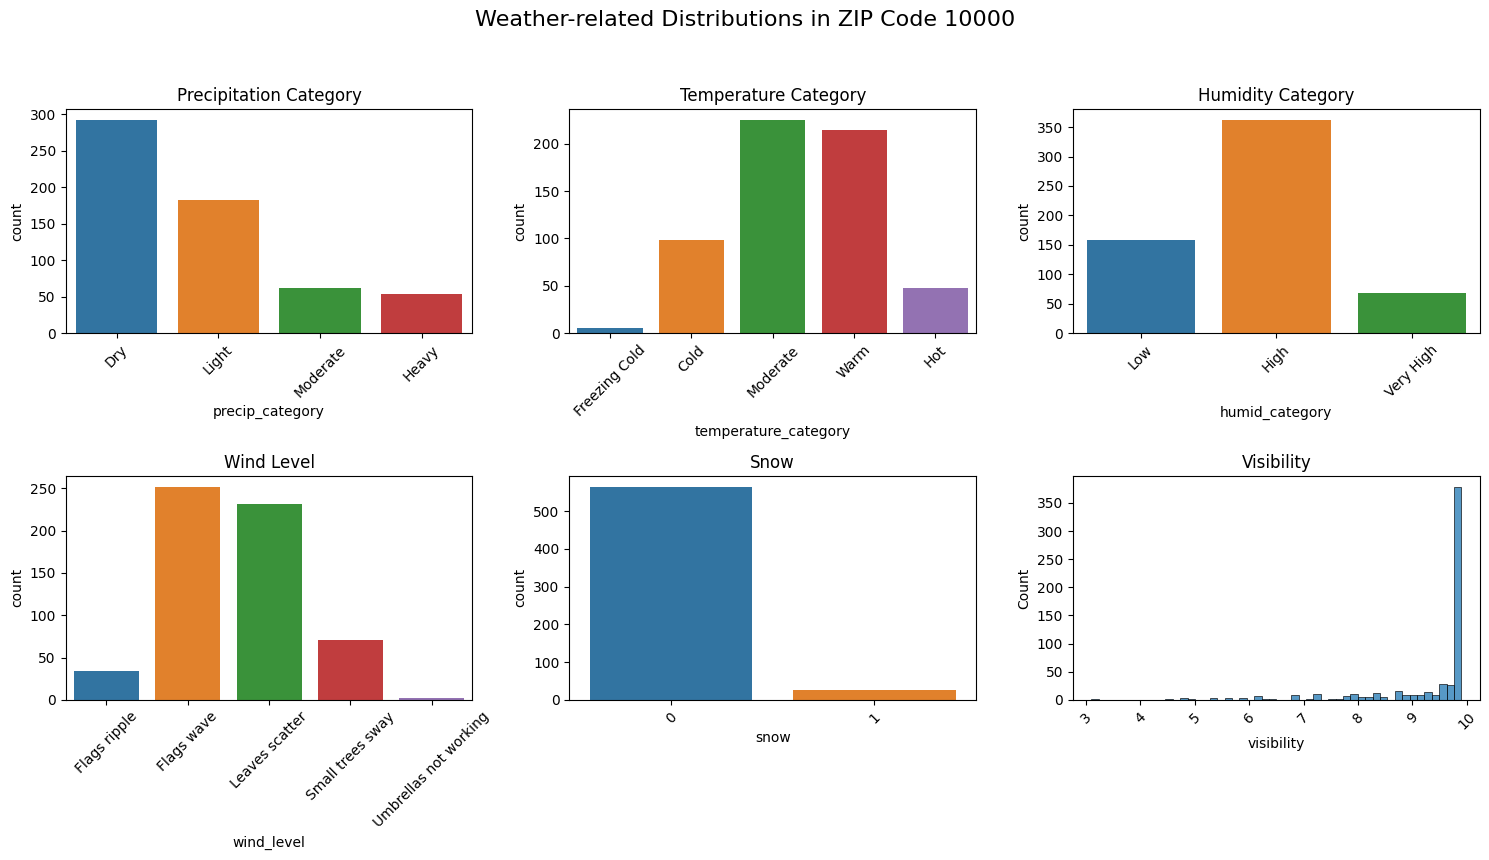

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for ZIP code 10001
zip10001_df = zipcode_weather_df[zipcode_weather_df['zip_code'] == '10001']

# Set up the grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle('Weather-related Distributions in ZIP Code 10000', fontsize=16)

# Plot distribution of Precipitation Category
precip_order = ['Dry', 'Light', 'Moderate', 'Heavy']
sns.countplot(x='precip_category', data=zip10001_df, order=precip_order, ax=axes[0, 0])
axes[0, 0].set_title('Precipitation Category')
axes[0, 0].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Temperature Category
temp_order = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
sns.countplot(x='temperature_category', data=zip10001_df, order=temp_order, ax=axes[0, 1])
axes[0, 1].set_title('Temperature Category')
axes[0, 1].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Humidity Category
humid_order = ['Low', 'High', 'Very High']
sns.countplot(x='humid_category', data=zip10001_df, order=humid_order, ax=axes[0, 2])
axes[0, 2].set_title('Humidity Category')
axes[0, 2].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Wind Level
wind_order = ['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working']
sns.countplot(x='wind_level', data=zip10001_df, order=wind_order, ax=axes[1, 0])
axes[1, 0].set_title('Wind Level')
axes[1, 0].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Snow
sns.countplot(x='snow', data=zip10001_df, ax=axes[1, 1])
axes[1, 1].set_title('Snow')
axes[1, 1].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Visibility
sns.histplot(x='visibility', data=zip10001_df, ax=axes[1, 2])
axes[1, 2].set_title('Visibility')
axes[1, 2].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [58]:
zipcode_weather_df[zipcode_weather_df['zip_code'] == '10000']


,zip_code,date,icon,temperature_category,precip_category,humid_category,wind_level,snow,visibility
row_id,,,,,,,,,
10000_2022-01-20,10000,2022-01-20,snow,Cold,Moderate,High,Leaves scatter,1,7.8
10000_2022-01-29,10000,2022-01-29,snow,Freezing Cold,Heavy,High,Small trees sway,1,3.7
10000_2022-02-25,10000,2022-02-25,snow,Cold,Heavy,High,Leaves scatter,1,7.9
10000_2022-04-27,10000,2022-04-27,rain,Moderate,Light,Low,Flags wave,0,9.9
10000_2022-05-01,10000,2022-05-01,rain,Moderate,Light,High,Flags wave,0,9.9
10000_2022-07-08,10000,2022-07-08,rain,Warm,Light,High,Flags wave,0,9.7
10000_2022-07-08,10000,2022-07-08,rain,Warm,Light,High,Flags wave,0,9.7
10000_2022-03-19,10000,2022-03-19,rain,Moderate,Moderate,High,Flags wave,0,8.3
10000_2022-07-19,10000,2022-07-19,clear-day,Hot,Dry,High,Flags wave,0,9.9


In [105]:
merged_df["injuries/total"] = merged_df["number_of_injuries"]/merged_df["count"]
merged_df["deaths/total"] = merged_df["number_of_deaths"]/merged_df["count"]
merged_df["inflicted/total"] = (merged_df["number_of_injuries"]+merged_df["number_of_deaths"])/merged_df["count"]

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


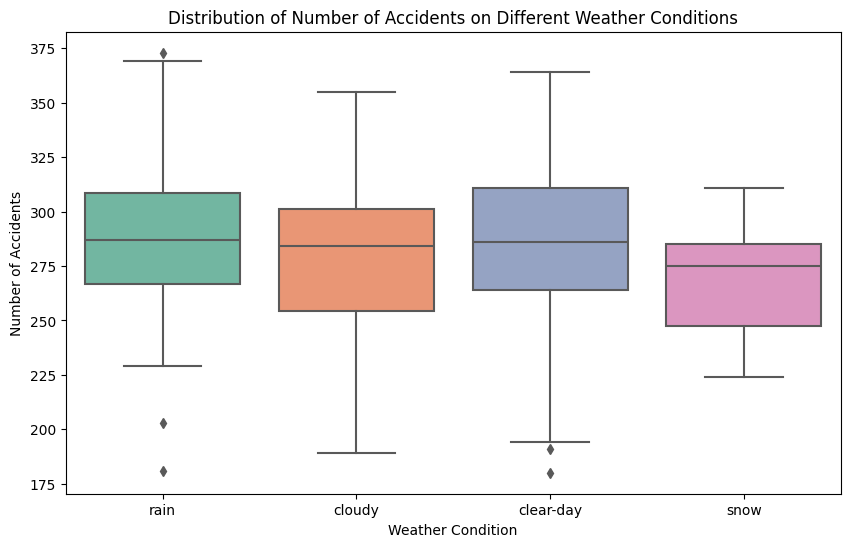

In [80]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='icon', y='count', data=merged_df, palette='Set2')
plt.title('Distribution of Number of Accidents on Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


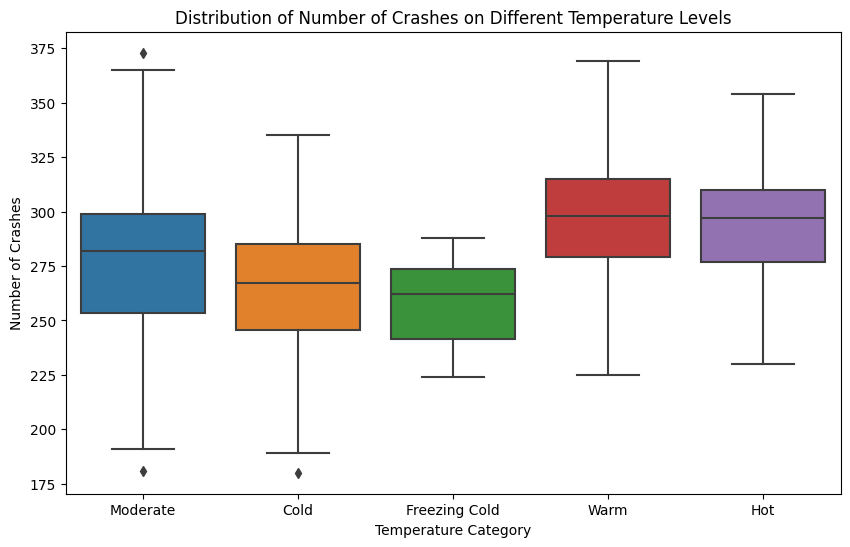

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='temperature_category', y='count', data=merged_df)

# Set plot labels and title
plt.xlabel('Temperature Category')
plt.ylabel('Number of Crashes')
plt.title('Distribution of Number of Crashes on Different Temperature Levels')

# Show the plot
plt.show()


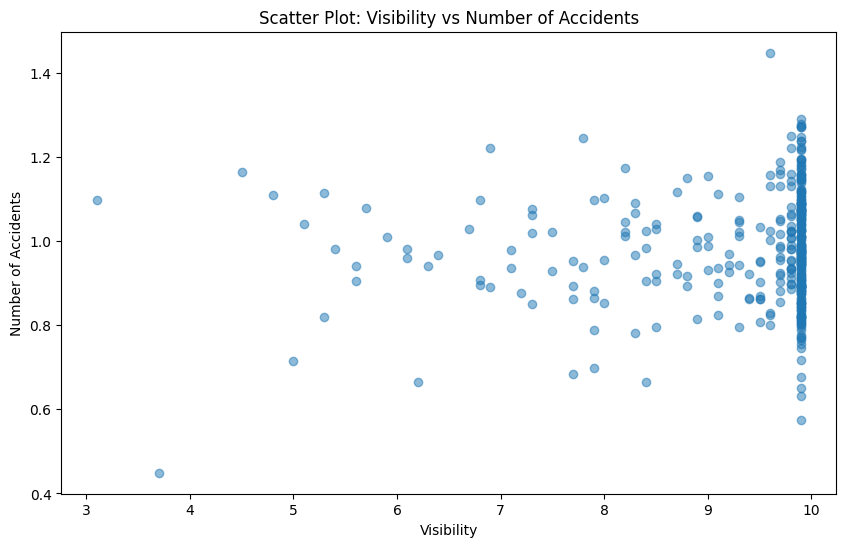

In [107]:
import matplotlib.pyplot as plt


# Select the relevant columns
subset_df = merged_df[['visibility', 'count',"inflicted/total"]]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subset_df['visibility'], subset_df['inflicted/total'], alpha=0.5)
plt.title('Scatter Plot: Visibility vs Number of Accidents')
plt.xlabel('Visibility')
plt.ylabel('Number of Accidents')
plt.show()


In [94]:
subset_df.groupby(["visibility"]).size()

visibility
3.1      1
3.7      1
4.5      1
4.8      1
5.0      1
5.1      1
5.3      2
5.4      1
5.6      2
5.7      1
5.9      1
6.1      2
6.2      1
6.3      1
6.4      1
6.7      1
6.8      3
6.9      2
7.1      2
7.2      1
7.3      4
7.5      2
7.7      4
7.8      2
7.9      5
8.0      3
8.2      4
8.3      4
8.4      4
8.5      5
8.7      3
8.8      3
8.9      5
9.0      4
9.1      5
9.2      3
9.3      7
9.4      3
9.5      8
9.6      8
9.7     16
9.8     27
9.9    209
dtype: int64

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

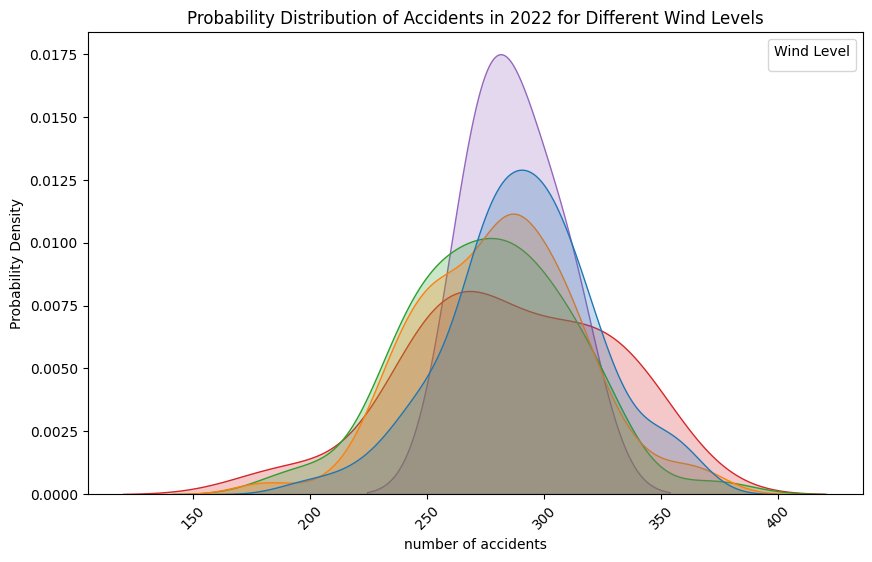

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution using a kernel density estimate (KDE) for each wind level
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x='count', hue='wind_level', common_norm=False, fill=True)

# Set plot labels and title
plt.xlabel('number of accidents')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Accidents in 2022 for Different Wind Levels')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='Wind Level', loc='upper right')

# Show the plot
plt.show()



/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


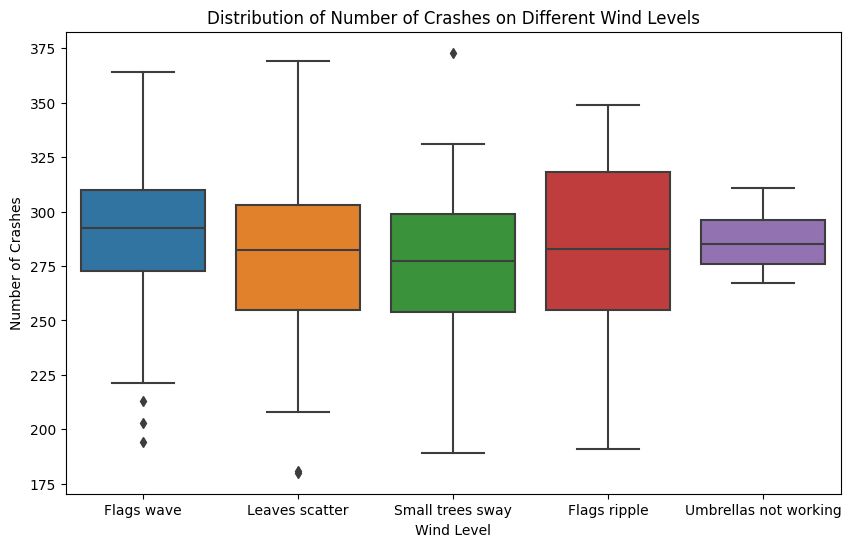

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='wind_level', y='count', data=merged_df)

# Set plot labels and title
plt.xlabel('Wind Level')
plt.ylabel('Number of Crashes')
plt.title('Distribution of Number of Crashes on Different Wind Levels')

# Show the plot
plt.show()

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


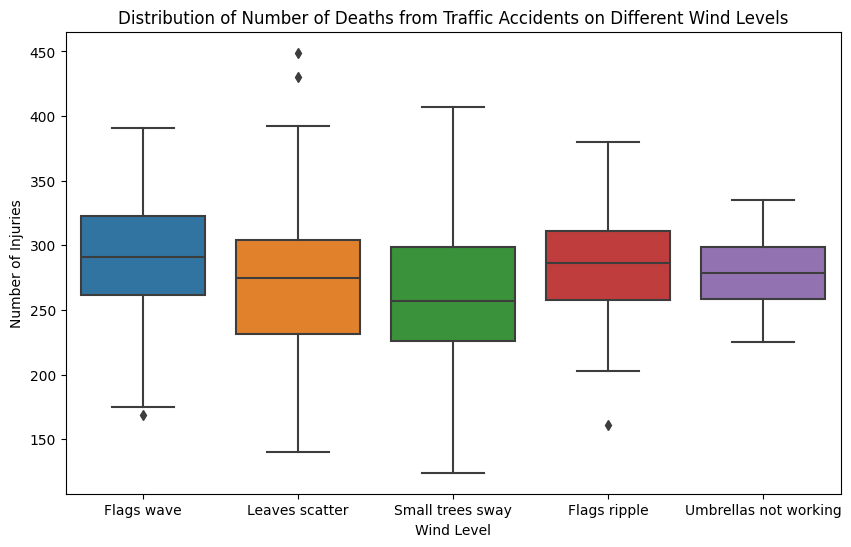

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='wind_level', y='number_of_injuries', data=merged_df)

# Set plot labels and title
plt.xlabel('Wind Level')
plt.ylabel('Number of Injuries')
plt.title('Distribution of Number of Deaths from Traffic Accidents on Different Wind Levels')

# Show the plot
plt.show()